In [0]:
#import required libraries
import io
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [131]:
# upload a sample labelled dataset with raw twitter text
from google.colab import files
uploaded = files.upload()

Saving elpaso_labelled.csv to elpaso_labelled (1).csv


In [132]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "elpaso_labelled.csv" with length 107400 bytes


In [0]:

df = pd.read_csv(io.StringIO(uploaded['elpaso_labelled.csv'].decode('latin-1')), index_col=0)

In [134]:
df.head(10)

,date,retweets,favorites,label,text
55054,05/08/19 4:27,0,0,1,8chan had nothing to do with the attacks and y...
30532,03/08/19 19:19,0,3,3,White supremacists have declared war against t...
65975,05/08/19 1:33,0,0,3,"Cloudflare Says It Won't Ban 8chan, a Hotbed f..."
8581,03/08/19 22:41,0,0,2,2A dates back to the time when young America h...
3572,03/08/19 23:33,0,3,2,Only fact that matters is already clear. Yet a...
20955,03/08/19 20:53,0,0,2,Where were the good guys with guns? They kinda...
18590,03/08/19 21:13,0,0,1,Research BEFORE you tweet. #2A pic.twitter.com...
22648,03/08/19 20:37,0,0,3,Can't wait for these thoughts and prayers to f...
13264,03/08/19 21:57,0,0,3,@FoxNews Here is some education on #psychopath...
43866,05/08/19 11:25,0,0,2,*this type of response* DNC candidates jumped ...


In [135]:
dft = df['label'].value_counts().reset_index()
dft.columns = ['label', 'count']
print (dft)

   label  count
0      3    279
1      2    179
2      1     40


In [136]:
df.dtypes

date         object
retweets      int64
favorites     int64
label         int64
text         object
dtype: object

In [0]:
# covert all tweet texts to lower case
df['clean_text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
# remove punctuations (#, @)
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]','')

In [139]:
#download the list of stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
# Remove all the stop words from the tweet text
# except the negation terms.
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['ë_õ__']
new_stopwords_list = stop_words.union(new_stopwords)

#remove words that are in NLTK stopwords list
not_stopwords = {'not', 'no', 'dont'} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])

print(final_stop_words)

{'down', 'just', 'being', "wouldn't", 'was', 'have', 'who', 'your', 't', 'where', "doesn't", 'me', 'very', 'were', 'aren', 'hers', 'than', 'under', 'any', 'for', 'now', 'shan', "you've", 'when', 'such', 'below', 'isn', "shouldn't", "hasn't", 'she', 'mustn', 'this', 'other', 'am', 'yourselves', 'after', 'but', 'into', 'further', 'only', 'himself', "don't", 'be', 'll', 'as', 'the', "mightn't", 'more', 'didn', 'that', 'once', 'those', 'between', 'd', 'about', 'will', 'these', 'own', 'him', 'our', 'itself', 'few', 'needn', 'because', 's', 'both', 'or', 'against', 'theirs', 'ours', "she's", 'they', "haven't", 'ma', "didn't", 'while', 'is', 'he', 'themselves', 'having', 'all', 'doing', 'had', 'my', 'out', 'o', 'before', 'weren', 'ain', 'ë_õ__', "weren't", 'their', 'in', 've', "isn't", 'won', 'haven', 'you', 'to', "it's", 'during', 'ourselves', 'until', 'by', 'above', "hadn't", "aren't", 'them', 'yours', 'on', 'then', "wasn't", "you'll", "that'll", 'with', 'here', 'an', 'up', 'each', 'his', '

In [141]:
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in final_stop_words))
df['clean_text'].head(10)

55054    8chan nothing attacks know welcome wrong side ...
30532    white supremacists declared war people united ...
65975    cloudflare says wont ban 8chan hotbed terroris...
8581     2a dates back time young america afraid brits ...
3572     fact matters already clear yet another guy ass...
20955    good guys guns kinda missed chance prove point...
18590            research tweet 2a pictwittercomviht1e8ka4
22648       cant wait thoughts prayers finally kick elpaso
13264    foxnews education psychopathy not mentalillnes...
43866    type response dnc candidates jumped blame game...
Name: clean_text, dtype: object

In [142]:
freq = pd.Series(' '.join(df['clean_text']).split()).value_counts()[-10:]
freq

focus                                                                                                                            1
transparency                                                                                                                     1
phone                                                                                                                            1
scheme                                                                                                                           1
cases                                                                                                                            1
mostly                                                                                                                           1
httpswwwrawstorycom201908elpasocongresswomanreactswithdisgustafterhearingtrumptweetblamingmediaforshootingsxugh7oqfoqytwitter    1
nastiness                                                                          

In [143]:
# Remove the rare words in the text column
freq = list(freq.index)
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['clean_text'].head()

55054    8chan nothing attacks know welcome wrong side ...
30532    white supremacists declared war people united ...
65975    cloudflare says wont ban 8chan hotbed terroris...
8581     2a dates back time young america afraid brits ...
3572     fact matters already clear yet another guy ass...
Name: clean_text, dtype: object

In [0]:
# remove special characters, numbers, punctuations
df['clean_text'] = df['clean_text'].str.replace("[^\x00-\x7F]", "")


In [145]:
df['clean_text'] = df['clean_text'].str.replace("_", "")
df['clean_text'].head()

55054    8chan nothing attacks know welcome wrong side ...
30532    white supremacists declared war people united ...
65975    cloudflare says wont ban 8chan hotbed terroris...
8581     2a dates back time young america afraid brits ...
3572     fact matters already clear yet another guy ass...
Name: clean_text, dtype: object

In [146]:
# Remove hyperlinks
df['clean_text'] = df['clean_text'].str.replace("http\S+", "")
df['clean_text'].head(10)

55054    8chan nothing attacks know welcome wrong side ...
30532    white supremacists declared war people united ...
65975    cloudflare says wont ban 8chan hotbed terroris...
8581     2a dates back time young america afraid brits ...
3572     fact matters already clear yet another guy ass...
20955    good guys guns kinda missed chance prove point...
18590            research tweet 2a pictwittercomviht1e8ka4
22648       cant wait thoughts prayers finally kick elpaso
13264    foxnews education psychopathy not mentalillnes...
43866    type response dnc candidates jumped blame game...
Name: clean_text, dtype: object

In [147]:
# Split the clean pre-processed text into tokens
df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
df['clean_text'].head()

55054    [8chan, nothing, attacks, know, welcome, wrong...
30532    [white, supremacists, declared, war, people, u...
65975    [cloudflare, says, wont, ban, 8chan, hotbed, t...
8581     [2a, dates, back, time, young, america, afraid...
3572     [fact, matters, already, clear, yet, another, ...
Name: clean_text, dtype: object

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Save the tokenised file for easy retrieval for later steps
df.to_csv('elpaso_tokenised.csv')
!cp elpaso_tokenised.csv drive/My\ Drive/

In [0]:
from google.colab import files
df.to_csv('elpaso_tokenised.csv', index=False)
files.download('elpaso_tokenised.csv')

In [150]:
from google.colab import files
uploaded = files.upload()

Saving elpaso_tokenised.csv to elpaso_tokenised (2).csv


In [151]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "elpaso_tokenised.csv" with length 187123 bytes


In [0]:
import pandas as pd
import io
dff = pd.read_csv(io.StringIO(uploaded['elpaso_tokenised.csv'].decode('latin-1')))

In [153]:
dff.head(10)

,date,retweets,favorites,label,text,clean_text
0,05/08/19 4:27,0,0,1,8chan had nothing to do with the attacks and y...,"['8chan', 'nothing', 'attacks', 'know', 'welco..."
1,03/08/19 19:19,0,3,3,White supremacists have declared war against t...,"['white', 'supremacists', 'declared', 'war', '..."
2,05/08/19 1:33,0,0,3,"Cloudflare Says It Won't Ban 8chan, a Hotbed f...","['cloudflare', 'says', 'wont', 'ban', '8chan',..."
3,03/08/19 22:41,0,0,2,2A dates back to the time when young America h...,"['2a', 'dates', 'back', 'time', 'young', 'amer..."
4,03/08/19 23:33,0,3,2,Only fact that matters is already clear. Yet a...,"['fact', 'matters', 'already', 'clear', 'yet',..."
5,03/08/19 20:53,0,0,2,Where were the good guys with guns? They kinda...,"['good', 'guys', 'guns', 'kinda', 'missed', 'c..."
6,03/08/19 21:13,0,0,1,Research BEFORE you tweet. #2A pic.twitter.com...,"['research', 'tweet', '2a', 'pictwittercomviht..."
7,03/08/19 20:37,0,0,3,Can't wait for these thoughts and prayers to f...,"['cant', 'wait', 'thoughts', 'prayers', 'final..."
8,03/08/19 21:57,0,0,3,@FoxNews Here is some education on #psychopath...,"['foxnews', 'education', 'psychopathy', 'not',..."
9,05/08/19 11:25,0,0,2,*this type of response* DNC candidates jumped ...,"['type', 'response', 'dnc', 'candidates', 'jum..."


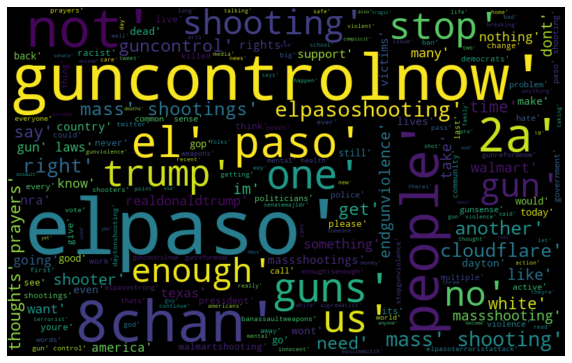

In [154]:
# Visualise the most common words in the dataset
all_words = ' '.join([text for text in dff['clean_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

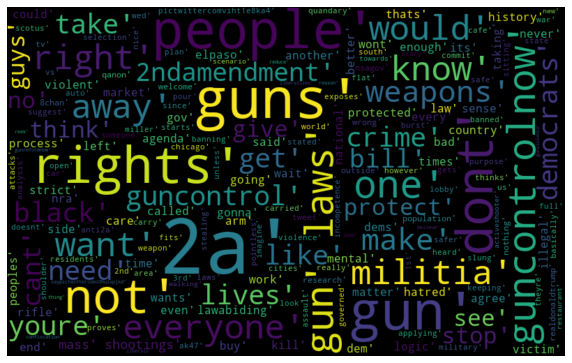

In [155]:
# Word cloud for the tweets that belong to category 1 (Pro-gun)
normal_words =' '.join([text for text in dff['clean_text'][dff['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

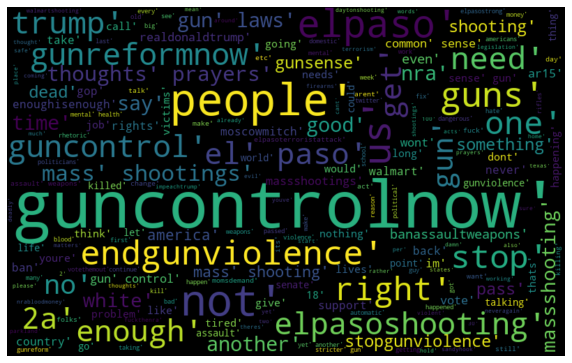

In [156]:
# Word cloud for the tweets that belong to category 2 (Anti-gun)
normal_words =' '.join([text for text in dff['clean_text'][dff['label'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
pip install --upgrade gensim

In [0]:
pip install word2vec

In [0]:
import gensim
from gensim.models.word2vec import Word2Vec

In [0]:
# Create the vector repesentation for words in the tokenised text using Word2Vec 
# Dimension of the vector representation for each word is 200.
model = Word2Vec(df['clean_text'], 
                 min_count=2,   
                 size=200,      
                 workers=2,     
                 window=5,      
                 iter=30)       

In [159]:
len(model.wv.vocab)

1026

In [160]:
model['elpaso']

array([-0.5157497 ,  0.19395468,  0.0498076 , -0.03738223, -0.08993779,
        0.03977282, -0.08811107,  0.03548469,  0.04300492, -0.13304763,
        0.38188463, -0.18977772, -0.03132907, -0.15059322, -0.31994253,
        0.22870605, -0.3295617 ,  0.17336765,  0.21134911, -0.0909485 ,
        0.4747577 , -0.38744283,  0.24071087,  0.38344014,  0.47194284,
        0.21436408, -0.01392644,  0.11667757,  0.18097186, -0.03905094,
        0.3650157 , -0.08065795,  0.35465026,  0.45779657, -0.21247752,
       -0.05780755, -0.20085476, -0.05925975, -0.23115739,  0.10504847,
        0.1484613 ,  0.15504058, -0.2921566 ,  0.14742552,  0.20348758,
       -0.3616596 ,  0.15236767,  0.04970116, -0.4589049 ,  0.2236714 ,
        0.58583   ,  0.29095638,  0.2749687 , -0.10372207,  0.65791047,
        0.3912929 , -0.25463706, -0.1271443 ,  0.12926821,  0.24324158,
        0.22542238,  0.1717781 ,  0.30244437,  0.22533841,  0.089844  ,
        0.76372856,  0.07835624, -0.00296178,  0.00435274,  0.22

In [0]:
model.save("word2vec_elpaso_unlabelled.model")

In [162]:
# Print the most similar word to 'guncontrol' based on the Word2Vec model
model.most_similar(positive=['guncontrol'])

[('not', 0.999944269657135),
 ('could', 0.9999345541000366),
 ('2a', 0.9999322891235352),
 ('country', 0.9999321699142456),
 ('weapons', 0.9999319314956665),
 ('pass', 0.9999282956123352),
 ('guncontrolnow', 0.9999281167984009),
 ('get', 0.9999252557754517),
 ('us', 0.9999247193336487),
 ('someone', 0.99992436170578)]

In [163]:
model.most_similar(positive=['2a'])

[('no', 0.9999358654022217),
 ('rights', 0.9999336004257202),
 ('get', 0.9999328851699829),
 ('guncontrol', 0.9999322891235352),
 ('guns', 0.999930739402771),
 ('not', 0.9999295473098755),
 ('need', 0.9999282956123352),
 ('right', 0.9999276995658875),
 ('weapons', 0.9999274015426636),
 ('nra', 0.9999274015426636)]